In [6]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key
# Import the datetime module from the datetime library.
from datetime import datetime

In [7]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [8]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [9]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
          citipy.nearest_city(coordinate[0], coordinate[1]).country_code)


rikitea pf
bluff nz
butaritari ki
tuatapere nz
lompoc us
barrow us
ilulissat gl
busselton au
saskylakh ru
kapoeta sd
banja luka ba
ribeira grande pt
vaini to
rikitea pf
horki by
pundaguitan ph
souillac mu
mataura pf
laguna br
port elizabeth za
kavaratti in
medicine hat ca
nikolskoye ru
albany au
pacific grove us
busselton au
lebu cl
kruisfontein za
avarua ck
jamestown sh
rikitea pf
kapaa us
georgetown sh
harper lr
rikitea pf
mandalgovi mn
dunedin nz
zatoka ua
northampton us
prince albert ca
rikitea pf
livingston us
chuy uy
atuona pf
sitka us
chokurdakh ru
hermanus za
saint george bm
punta arenas cl
rikitea pf
parana br
tasiilaq gl
tumannyy ru
arraial do cabo br
carnarvon au
bilibino ru
ambon id
coquimbo cl
castro cl
mataura pf
puerto ayora ec
rio grande br
khatanga ru
tasiilaq gl
rikitea pf
grivenskaya ru
macenta gn
plouzane fr
hermanus za
lebu cl
nizwa om
busselton au
yellowknife ca
namatanai pg
albany au
barrow us
lourdes ph
hobart au
black diamond ca
vygonichi ru
tasiilaq gl
kumluca

bluff nz
punta arenas cl
vaitupu wf
norman wells ca
luderitz na
dakar sn
albany au
mataura pf
hambantota lk
pemba mz
saint george bm
hermanus za
haines junction ca
longyearbyen sj
san agustin co
taolanaro mg
tiksi ru
mahebourg mu
new norfolk au
los llanos de aridane es
palabuhanratu id
vyatskiye polyany ru
albany au
peniche pt
mataura pf
atuona pf
bluff nz
east london za
sarangani ph
kodiak us
nioro ml
yellowknife ca
codrington ag
saint anthony ca
tevaitoa pf
bluff nz
tsentralnyy ru
samusu ws
kalmunai lk
caravelas br
kaduqli sd
churapcha ru
antofagasta cl
porto velho br
jamestown sh
cape town za
saint-philippe re
coahuayana mx
ponta do sol cv
barentsburg sj
bambous virieux mu
la montanita co
lebu cl
barentsburg sj
pangkalanbuun id
vaini to
caete br
leningradskiy ru
albany au
bayir jo
luan cn
acarau br
tuatapere nz
provideniya ru
atar mr
nikolskoye ru
straumen no
booue ga
cockburn harbour tc
vaini to
golspie gb
busselton au
rocha uy
tasiilaq gl
lorengau pg
sao filipe cv
san cristobal ec

In [15]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

586

In [16]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=917379ec1acc1dcf0211518284b20e5f


In [17]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | rikitea
Processing Record 2 of Set 1 | bluff
Processing Record 3 of Set 1 | butaritari
Processing Record 4 of Set 1 | tuatapere
Processing Record 5 of Set 1 | lompoc
Processing Record 6 of Set 1 | barrow
Processing Record 7 of Set 1 | ilulissat
Processing Record 8 of Set 1 | busselton
Processing Record 9 of Set 1 | saskylakh
Processing Record 10 of Set 1 | kapoeta
Processing Record 11 of Set 1 | banja luka
Processing Record 12 of Set 1 | ribeira grande
Processing Record 13 of Set 1 | vaini
Processing Record 14 of Set 1 | horki
Processing Record 15 of Set 1 | pundaguitan
Processing Record 16 of Set 1 | souillac
Processing Record 17 of Set 1 | mataura
Processing Record 18 of Set 1 | laguna
Processing Record 19 of Set 1 | port elizabeth
Processing Record 20 of Set 1 | kavaratti
Processing Record 21 of Set 1 | medicine hat
Processing Record 22 of Set 1 | nikolskoye
Processing Record 23 of Set 1 | alb

Processing Record 37 of Set 4 | cidreira
Processing Record 38 of Set 4 | puerto suarez
Processing Record 39 of Set 4 | ambovombe
Processing Record 40 of Set 4 | san andres del rabanedo
Processing Record 41 of Set 4 | thompson
Processing Record 42 of Set 4 | cape town
Processing Record 43 of Set 4 | cayenne
Processing Record 44 of Set 4 | manta
Processing Record 45 of Set 4 | namibe
Processing Record 46 of Set 4 | odienne
Processing Record 47 of Set 4 | seoul
Processing Record 48 of Set 4 | mayo
Processing Record 49 of Set 4 | port lincoln
Processing Record 50 of Set 4 | anloga
Processing Record 1 of Set 5 | eresos
Processing Record 2 of Set 5 | adre
Processing Record 3 of Set 5 | hovd
Processing Record 4 of Set 5 | beringovskiy
Processing Record 5 of Set 5 | kloulklubed
Processing Record 6 of Set 5 | boende
Processing Record 7 of Set 5 | eyl
Processing Record 8 of Set 5 | acari
Processing Record 9 of Set 5 | port blair
Processing Record 10 of Set 5 | liverpool
Processing Record 11 of S

Processing Record 26 of Set 8 | nioro
Processing Record 27 of Set 8 | saint anthony
Processing Record 28 of Set 8 | tevaitoa
Processing Record 29 of Set 8 | tsentralnyy
City not found. Skipping...
Processing Record 30 of Set 8 | kalmunai
Processing Record 31 of Set 8 | kaduqli
Processing Record 32 of Set 8 | churapcha
Processing Record 33 of Set 8 | antofagasta
Processing Record 34 of Set 8 | porto velho
Processing Record 35 of Set 8 | ponta do sol
Processing Record 36 of Set 8 | la montanita
Processing Record 37 of Set 8 | pangkalanbuun
Processing Record 38 of Set 8 | caete
Processing Record 39 of Set 8 | leningradskiy
Processing Record 40 of Set 8 | bayir
Processing Record 41 of Set 8 | luan
Processing Record 42 of Set 8 | acarau
Processing Record 43 of Set 8 | atar
Processing Record 44 of Set 8 | straumen
Processing Record 45 of Set 8 | booue
Processing Record 46 of Set 8 | cockburn harbour
City not found. Skipping...
Processing Record 47 of Set 8 | golspie
Processing Record 48 of S

Processing Record 15 of Set 12 | mus
Processing Record 16 of Set 12 | miranda
Processing Record 17 of Set 12 | praia da vitoria
Processing Record 18 of Set 12 | nome
Processing Record 19 of Set 12 | sulangan
Processing Record 20 of Set 12 | trelew
Processing Record 21 of Set 12 | mingaora
Processing Record 22 of Set 12 | raudeberg
Processing Record 23 of Set 12 | tres lagoas
Processing Record 24 of Set 12 | berlevag
Processing Record 25 of Set 12 | fort saint john
City not found. Skipping...
Processing Record 26 of Set 12 | sterling
Processing Record 27 of Set 12 | olinda
Processing Record 28 of Set 12 | plastun
Processing Record 29 of Set 12 | wentzville
Processing Record 30 of Set 12 | elizabeth city
Processing Record 31 of Set 12 | kizukuri
Processing Record 32 of Set 12 | peleduy
Processing Record 33 of Set 12 | tukrah
Processing Record 34 of Set 12 | estelle
Processing Record 35 of Set 12 | lusambo
Processing Record 36 of Set 12 | sioux lookout
-----------------------------
Data R

In [18]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Rikitea,-23.1203,-134.9692,78.24,72,100,6.71,PF,2021-04-27 02:47:32
1,Bluff,-46.6000,168.3333,46.99,69,90,8.99,NZ,2021-04-27 02:47:32
2,Butaritari,3.0707,172.7902,82.87,75,54,11.34,KI,2021-04-27 02:47:32
3,Tuatapere,-46.1333,167.6833,46.99,69,95,8.99,NZ,2021-04-27 02:44:43
4,Lompoc,34.6391,-120.4579,53.60,71,1,14.97,US,2021-04-27 02:47:33
5,Barrow,71.2906,-156.7887,21.20,68,1,17.27,US,2021-04-27 02:47:33
6,Ilulissat,69.2167,-51.1000,39.20,65,20,5.75,GL,2021-04-27 02:45:55
7,Busselton,-33.6500,115.3333,73.99,76,38,1.99,AU,2021-04-27 02:43:26
8,Saskylakh,71.9167,114.0833,13.23,87,28,5.39,RU,2021-04-27 02:47:33
9,Kapoeta,4.7717,33.5903,71.47,81,100,8.68,SS,2021-04-27 02:47:34


In [35]:
# city_data = (city_data_df['City'],
#              city_data_df['Country Date'],
#              city_data_df['Lat'],
#              city_data_df['Lng'],
#              city_data_df['Max Temp'],
#              city_data_df['Humidity'], 
#              city_data_df['Cloudiness'],
#              city_data_df['Wind Speed'])
city_data = pd.DataFrame(city_data_df[['City',
                        'Country',
                        'Date',
                        'Lat',
                        'Lng',
                        'Max Temp',
                        'Humidity', 
                        'Cloudiness',
                        'Wind Speed']])
# df = df[["C", "A", "B"]]
city_data.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Rikitea,PF,2021-04-27 02:47:32,-23.1203,-134.9692,78.24,72,100,6.71
1,Bluff,NZ,2021-04-27 02:47:32,-46.6000,168.3333,46.99,69,90,8.99
2,Butaritari,KI,2021-04-27 02:47:32,3.0707,172.7902,82.87,75,54,11.34
3,Tuatapere,NZ,2021-04-27 02:44:43,-46.1333,167.6833,46.99,69,95,8.99
4,Lompoc,US,2021-04-27 02:47:33,34.6391,-120.4579,53.60,71,1,14.97


In [37]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")


In [38]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

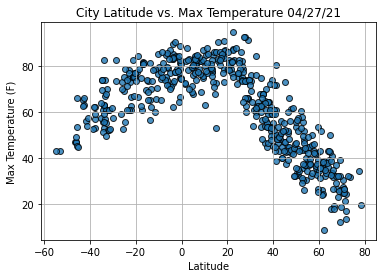

In [40]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

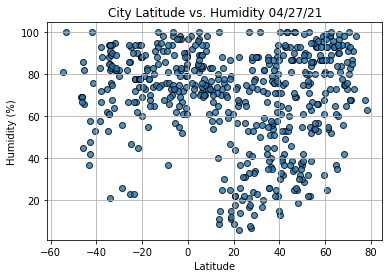

In [41]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

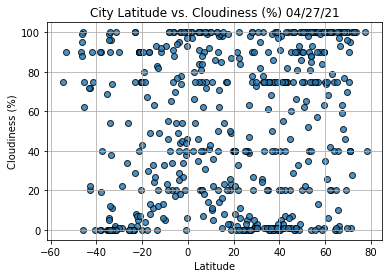

In [42]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

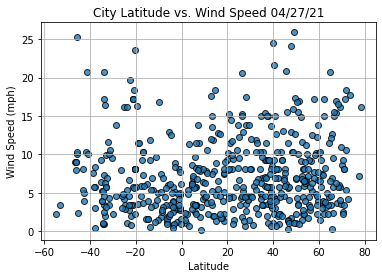

In [43]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()